# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings ("ignore")


In [2]:
import pandas as pd
A= pd.read_csv("D:/Data Science/Machine learinng/Project/2/training_set.csv")

In [3]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


# Missing Data Treatmemnt

In [4]:
from PM8wd import replacer
replacer(A)

# Define X and Y

In [5]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

# EDA

    Ycat,Xcon ---> ANOVA
    Ycat,Xcat ---> chisquare

# Divide data in con and cat

In [6]:
cat =[]
con =[]
for i in X.columns:
    if (X[i].dtypes =="object"):
        cat.append(i)
    else:
        con.append(i)

In [7]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [8]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
from PM8wd import ANOVA,chisquare

for i in con:
    print("---------","Loan_Status VS",i,"--------")
    print(ANOVA(A,"Loan_Status",i))

--------- Loan_Status VS ApplicantIncome --------
0.90252
--------- Loan_Status VS CoapplicantIncome --------
0.14239
--------- Loan_Status VS LoanAmount --------
0.36769
--------- Loan_Status VS Loan_Amount_Term --------
0.60396
--------- Loan_Status VS Credit_History --------
0.0


In [10]:
chisquare

<function PM8wd.chisquare(df, cat1, cat2)>

In [11]:
for i in cat:
    print("--------""Loan_Status vs ",i,"--------")
    print(chisquare(A,"Loan_Status",i))

--------Loan_Status vs  Gender --------
0.73915
--------Loan_Status vs  Married --------
0.02961
--------Loan_Status vs  Dependents --------
0.36887
--------Loan_Status vs  Education --------
0.0431
--------Loan_Status vs  Self_Employed --------
1.0
--------Loan_Status vs  Property_Area --------
0.00214


# Outliers

In [86]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [87]:
ss.fit(X[con])

StandardScaler()

In [88]:
X1 =pd.DataFrame(ss.transform(X[con]),columns=con)


In [89]:
X1.head(2)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.398479,-0.860843,0.184585,0.239408,0.456461
1,0.248823,0.053073,-0.143355,0.239408,0.456461


In [90]:
from PM8wd import outliers 
OL = outliers(X1)

In [91]:
OL

[11,
 19,
 32,
 36,
 60,
 64,
 65,
 88,
 94,
 96,
 98,
 111,
 118,
 123,
 128,
 131,
 135,
 137,
 139,
 156,
 163,
 170,
 172,
 177,
 190,
 219,
 229,
 232,
 234,
 240,
 241,
 245,
 247,
 267,
 269,
 298,
 307,
 308,
 316,
 333,
 337,
 351,
 353,
 354,
 356,
 366,
 374,
 381,
 402,
 407,
 420,
 429,
 437,
 442,
 443,
 447,
 451,
 454,
 468,
 485,
 486,
 504,
 506,
 509,
 510,
 523,
 540,
 555,
 558,
 559,
 568,
 573]

In [92]:
X = X.drop(index=OL,axis=0)
Y = Y.drop(index=OL,axis=0)

In [93]:
A.shape

(614, 13)

In [94]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])


# Preprocessing

In [95]:
from PM8wd import preprocessing
Xnew = preprocessing(X)

In [96]:
Xnew.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.766124,-0.920135,0.301569,-0.028297,0.449699,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.557193,0.144271,-0.076755,-0.028297,0.449699,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.576154,-0.920135,-1.350700,-0.028297,0.449699,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


In [97]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(pred_tr,ytrain)
ts_acc = accuracy_score(pred_ts,ytest)

In [98]:
tr_acc

0.8118811881188119

In [99]:
ts_acc

0.8514851485148515

In [100]:
Xnew.shape

(505, 20)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="entropy",random_state=21,max_depth=3)

model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)


In [102]:
tr_acc

0.8118811881188119

In [103]:
ts_acc

0.8514851485148515

# Griddearch CV

In [104]:
tuning_grid = {"max_depth":range(2,5,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [105]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)


In [106]:
cvmodel.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 23}

In [107]:
rfc = RandomForestClassifier(criterion='gini',max_depth=4,n_estimators=20,random_state=21)

In [108]:
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [109]:
tr_acc

0.8217821782178217

In [110]:
ts_acc

0.8415841584158416

# Getting Data ready for Predictions

In [111]:
B = pd.read_csv("D:/Data Science/Machine learinng/Project/2/testing_set.csv")

In [112]:
B1 = B[X.columns].head()

In [113]:
B1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Missing Data Treatment

In [114]:
B1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       1
Property_Area        0
dtype: int64

In [115]:
replacer(B)

In [116]:
cat=[]
con=[]
for i in B.columns:
    if(B[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
    

In [117]:
B[con]


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.000000
1,3076,1500,126.0,360.0,1.000000
2,5000,1800,208.0,360.0,1.000000
3,2340,2546,100.0,360.0,0.825444
4,3276,0,78.0,360.0,1.000000
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000
363,4158,709,115.0,360.0,1.000000
364,3250,1993,126.0,360.0,0.825444
365,5000,2393,158.0,360.0,1.000000


In [118]:
B1 = pd.DataFrame(ss.transform(B[con]),columns=con)
B2 = pd.get_dummies(B[cat])
Bnew = B1.join(B2)

In [119]:
ready_for_pred = Bnew[Xnew.columns]

In [120]:
predicted_final = model.predict(ready_for_pred)

In [121]:
E = pd.DataFrame([B.Loan_ID,predicted_final]).T
E.columns = ["Loan_ID","Loan_Status"]

In [122]:
E.to_csv("submission.csv")

In [123]:
E.head(3)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y


# If customer is not eligible for the input required amount and duration:

        a.)what can be amount for the given duration.(Regression)

In [50]:
B['Loan_Status'] = predicted_final

In [51]:
B.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Find out people for whom loan was rejected(testing set)

In [52]:
xtest = B[B.Loan_Status=="N"]
xtest_1 = xtest.drop(labels=['Loan_ID','LoanAmount','Loan_Status'],axis=1)

In [53]:
xtest_1.index = range(0,xtest_1.shape[0])

# Create training data based on above predictors

In [54]:
Q = A[xtest_1.columns]
Q['LS'] = A.Loan_Status

In [55]:
Q = Q[Q.LS == "Y"]
Q = Q.drop(labels=['LS'],axis=1)

In [56]:
R = A[["LoanAmount"]]
R = R.iloc[Q.index,:]
R.index = range(0,R.shape[0])

In [57]:
Q.shape[0]

422

In [58]:
Q.index = range(0,Q.shape[0])

# Preprocessing

In [59]:
replacer(Q)
replacer(xtest_1)

In [60]:
from PM8wd import preprocessing
xtrain = preprocessing(Q)
xtest_final = preprocessing(xtest_1)

In [61]:
ytrain = R.LoanAmount

In [62]:
ytrain.head(3)

0    146.412162
1     66.000000
2    120.000000
Name: LoanAmount, dtype: float64

# Regression model 

In [63]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest_final)

In [64]:
pred.shape

(59,)

In [65]:
act = B[B.Loan_Status == "N"][["LoanAmount"]]

In [66]:
act.index = range(0,59)

In [67]:
E = range(0,59)

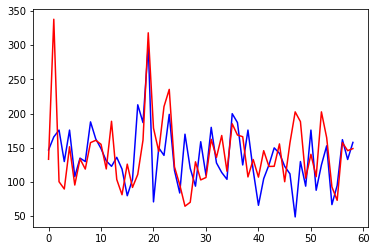

In [68]:
import matplotlib.pyplot as plt
plt.plot(act,c="blue")
plt.plot(pred,c="red")

# if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [69]:
B['Duration'] = B.Loan_Amount_Term/12


In [70]:
data_for_pred = B[(B.Duration<20)&(B.Loan_Status=='Y')]
data_for_pred_final = data_for_pred.drop(labels=['Duration','Loan_ID','Loan_Status','Loan_Amount_Term'],axis=1)
data_for_pred_final.index = range(0,data_for_pred_final.shape[0])

In [72]:
data_for_pred_final.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban
1,Male,No,0,Graduate,No,1300,3470,100.0,1.000000,Semiurban
2,Female,No,3+,Not Graduate,No,2083,0,28.0,1.000000,Urban


# Prepare Training Data

In [73]:
T = A[A.Loan_Status =="Y"]
T1 = T[data_for_pred_final.columns]
T1.index = range(0,T1.shape[0])

In [74]:
xtrain = preprocessing(T1)

In [75]:
ytrain = T[["Loan_Amount_Term"]]


In [76]:
ytrain.index = range(0,ytrain.shape[0])

In [77]:
replacer(data_for_pred_final)
final_pred = preprocessing(data_for_pred_final)

In [78]:
model = lm.fit(xtrain,ytrain)
pred = model.predict(final_pred)

In [79]:
U = B[(B.Duration<=20)&(B.Loan_Status=="Y")][["Loan_Amount_Term"]]
U.index = range(0,U.shape[0])

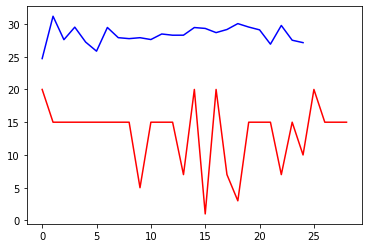

In [80]:
plt.plot(U/12,c="red")
plt.plot(pred/12,c="blue")

In [81]:
U.shape

(29, 1)

In [82]:
pred.shape

(25, 1)

In [83]:
U

,Loan_Amount_Term
0,240.0
1,180.0
2,180.0
3,180.0
4,180.0
5,180.0
6,180.0
7,180.0
8,180.0
9,60.0
